In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math

In [48]:
variaveis_uf_ano = pd.read_excel('./dados_para_dashboard/variaveis_uf_ano.xlsx', engine='openpyxl')

df = pd.read_excel('./dados_para_dashboard/variaveis_uf_ano.xlsx', engine='openpyxl')

variaveis_uf_ano

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08
...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09


In [3]:
# Criando UF em codigo
CondUF =  [(variaveis_uf_ano['uf'] == 'RO'),
         (variaveis_uf_ano["uf"] == 'AC'),
         (variaveis_uf_ano["uf"] == 'AM'),
         (variaveis_uf_ano["uf"] == 'RR'),
         (variaveis_uf_ano["uf"] == 'PA'),
         (variaveis_uf_ano["uf"] == 'AP'),
         (variaveis_uf_ano["uf"] == 'TO'),
         (variaveis_uf_ano["uf"] == 'MA'),
         (variaveis_uf_ano["uf"] == 'PI'),
         (variaveis_uf_ano["uf"] == 'CE'),
         (variaveis_uf_ano["uf"] == 'RN'),
         (variaveis_uf_ano["uf"] == 'PB'),
         (variaveis_uf_ano["uf"] == 'PE'),
         (variaveis_uf_ano["uf"] == 'AL'),
         (variaveis_uf_ano["uf"] == 'SE'),
         (variaveis_uf_ano["uf"] == 'BA'),
         (variaveis_uf_ano["uf"] == 'MG'),
         (variaveis_uf_ano["uf"] == 'ES'),
         (variaveis_uf_ano["uf"] == 'RJ'),
         (variaveis_uf_ano["uf"] == 'SP'),
         (variaveis_uf_ano["uf"] == 'PR'),
         (variaveis_uf_ano["uf"] == 'SC'),
         (variaveis_uf_ano["uf"] == 'RS'),
         (variaveis_uf_ano["uf"] == 'MS'),
         (variaveis_uf_ano["uf"] == 'MT'),
         (variaveis_uf_ano["uf"] == 'GO'),
         (variaveis_uf_ano["uf"] == 'DF')
         ]
          
UF_nomes = ['11','12','13','14','15','16','17','21','22','23','24','25','26','27','28','29','31','32','33','35','41','42','43','50','51','52','53']
variaveis_uf_ano["Cod_UF"] = np.select(CondUF, UF_nomes, default="Error")

variaveis_uf_ano

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas,Cod_UF
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08,12
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07,12
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08,12
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08,12
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08,12
...,...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09,17
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09,17
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10,17
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09,17


In [4]:
#Criando variável regiao.
CondReg =  [(variaveis_uf_ano['Cod_UF'] == '11') | (variaveis_uf_ano["Cod_UF"] == '12') | (variaveis_uf_ano["Cod_UF"] == '13') | (variaveis_uf_ano["Cod_UF"] == '14') | (variaveis_uf_ano["Cod_UF"] == '15') | (variaveis_uf_ano["Cod_UF"] == '16') | (variaveis_uf_ano["Cod_UF"] == '17'),
            (variaveis_uf_ano["Cod_UF"] == '21') | (variaveis_uf_ano["Cod_UF"] == '22') | (variaveis_uf_ano["Cod_UF"] == '23') | (variaveis_uf_ano["Cod_UF"] == '24') | (variaveis_uf_ano["Cod_UF"] == '25') | (variaveis_uf_ano["Cod_UF"] == '26') | (variaveis_uf_ano["Cod_UF"] == '27') | (variaveis_uf_ano["Cod_UF"] == '28') | (variaveis_uf_ano["Cod_UF"] == '29'),
            (variaveis_uf_ano["Cod_UF"] == '31') | (variaveis_uf_ano["Cod_UF"] == '32') | (variaveis_uf_ano["Cod_UF"] == '33') | (variaveis_uf_ano["Cod_UF"] == '35'),
            (variaveis_uf_ano["Cod_UF"] == '41') | (variaveis_uf_ano["Cod_UF"] == '42') | (variaveis_uf_ano["Cod_UF"] == '43'),
            (variaveis_uf_ano["Cod_UF"] == '50') | (variaveis_uf_ano["Cod_UF"] == '51') | (variaveis_uf_ano["Cod_UF"] == '52') | (variaveis_uf_ano["Cod_UF"] == '53')
           ]
            
Regiao_nomes = ['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']
variaveis_uf_ano["regiao"] = np.select(CondReg, Regiao_nomes, default="Error")
variaveis_uf_ano

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas,Cod_UF,regiao
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08,12,Norte
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07,12,Norte
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08,12,Norte
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08,12,Norte
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08,12,Norte
...,...,...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09,17,Norte
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09,17,Norte
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10,17,Norte
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09,17,Norte


In [5]:
# Ajuste o modelo de regressão linear OLS
# o que se quer entender é se as emendas parlamentares se relacionam com gastos

X = variaveis_uf_ano['valor_emendas']   # Variáveis independentes (características)
X = sm.add_constant(X)  # Adiciona uma constante para o termo de intercepção
y = variaveis_uf_ano['gastos']  # Variável dependente (alvo)

# Ajuste do modelo
model_gasto = sm.OLS(y, X).fit()

# Imprima o resumo do modelo
print(model_gasto.summary())

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     517.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.58e-62
Time:                        10:19:40   Log-Likelihood:                -5180.6
No. Observations:                 243   AIC:                         1.037e+04
Df Residuals:                     241   BIC:                         1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.149e+08   3.08e+07     10.220

In [16]:
# Ajuste o modelo de regressão linear OLS
# o que se quer entender é se as emendas parlamentares se relacionam com gastos percapita

X = variaveis_uf_ano['valor_emendas']   # Variáveis independentes (características)
X = sm.add_constant(X)  # Adiciona uma constante para o termo de intercepção
y = variaveis_uf_ano['gastos_percapita']  # Variável dependente (alvo)

# Ajuste do modelo
model_gasto_pc = sm.OLS(y, X).fit()

# Imprima o resumo do modelo
print(model_gasto_pc.summary())

                            OLS Regression Results                            
Dep. Variable:       gastos_percapita   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     273.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.62e-41
Time:                        10:24:14   Log-Likelihood:                -2337.7
No. Observations:                 243   AIC:                             4679.
Df Residuals:                     241   BIC:                             4686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2812.8504    255.777     10.997

In [6]:
correlation_matrix = variaveis_uf_ano[['valor_emendas', 'gastos']].corr()
print(correlation_matrix)

               valor_emendas    gastos
valor_emendas       1.000000  0.825895
gastos              0.825895  1.000000


In [39]:
# Figura da regressão 1 gastos x emendas

# Ajuste do modelo
model_gasto = sm.OLS(y, X).fit()

# Calcular R²
r2 = model_gasto.rsquared

# Use o Plotly Express para criar o gráfico
fig_reg1 = px.scatter(variaveis_uf_ano, x='valor_emendas', y='gastos', trendline="ols",template='plotly_dark',
                labels={'valor_emendas': 'Emendas Parlamentares', 'gastos': 'Gastos'},
                hover_data=['valor_emendas', 'gastos']).update_layout(
    title=dict(
        text='Regressão Linear Simples',
        font=dict(size=24)  # Tamanho do título
    ),
    title_x=0.5
).update_xaxes(showgrid=False).update_yaxes(
                showticklabels=False, showgrid=False)


# Adicione uma anotação para R²
fig_reg1.add_annotation(x=0.1, y=0.9, text=f"R² = {r2:.2f}", showarrow=False, 
                   xref="paper", yref="paper").update_layout(autosize=False, width=800, height=600)

fig_reg1.show()

In [40]:
# Figura da regressão 2 gastos per capita x emendas

# Ajuste do modelo
model_gastopc = sm.OLS(y, X).fit()

# Calcular R²
r2 = model_gastopc.rsquared

# Use o Plotly Express para criar o gráfico
fig_reg2 = px.scatter(variaveis_uf_ano, x='valor_emendas', y='gastos_percapita', trendline="ols",template='plotly_dark',
                labels={'valor_emendas': 'Emendas Parlamentares', 'gastos_percapita': 'Gastos per capita'},
                hover_data=['valor_emendas', 'gastos_percapita']).update_layout(
    title=dict(
        text='Regressão Linear Simples',
        font=dict(size=24)  # Tamanho do título
    ),
    title_x=0.5
).update_xaxes(showgrid=False).update_yaxes(
                showticklabels=False, showgrid=False)


# Adicione uma anotação para R²
fig_reg2.add_annotation(x=0.1, y=0.9, text=f"R² = {r2:.2f}", showarrow=False, 
                   xref="paper", yref="paper").update_layout(autosize=False, width=800, height=600)

fig_reg2.show()

In [8]:
variaveis_uf_ano['ano_emenda'] = (variaveis_uf_ano['ano'] >= 2018).astype(int)
variaveis_uf_ano

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas,Cod_UF,regiao,ano_emenda
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08,12,Norte,0
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07,12,Norte,0
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08,12,Norte,0
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08,12,Norte,0
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08,12,Norte,1
...,...,...,...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09,17,Norte,1
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09,17,Norte,1
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10,17,Norte,1
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09,17,Norte,1


In [42]:
# controlando por ano antes e depois de 2018.
X = variaveis_uf_ano[['valor_emendas', 'ano_emenda']]
X = sm.add_constant(X)  
y = variaveis_uf_ano['gastos']  

# Ajuste do modelo
model = sm.OLS(y, X).fit()

# Calcular R²
r2 = model.rsquared

# Use o Plotly Express para criar o gráfico
fig3 = px.scatter(variaveis_uf_ano, x='valor_emendas', y='gastos', trendline="ols", title='Regressão Linear Simples',
                labels={'valor_emendas': 'Valor das Emendas', 'gastos': 'Gastos'},
                hover_data=['valor_emendas', 'gastos'])

fig3.update_layout(title=dict(
        text='Regressão Linear Simples',
        font=dict(size=24)  # Tamanho do título
    ),
    title_x=0.5
).update_xaxes(showgrid=False).update_yaxes(
                showticklabels=False, showgrid=False)

# Adicione uma anotação para R²
fig3.add_annotation(x=0.1, y=0.9, text=f"R² = {r2:.2f}", showarrow=False, 
                   xref="paper", yref="paper")

fig3.update_layout(autosize=False, width=800, height=600)

# Mostrar a figura
fig3.show()

In [10]:
variaveis_uf_ano_dum = pd.get_dummies(variaveis_uf_ano, columns=['regiao'], dtype=int)
variaveis_uf_ano_dum

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas,Cod_UF,ano_emenda,regiao_Centro-Oeste,regiao_Nordeste,regiao_Norte,regiao_Sudeste,regiao_Sul
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08,12,0,0,0,1,0,0
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07,12,0,0,0,1,0,0
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08,12,0,0,0,1,0,0
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08,12,0,0,0,1,0,0
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08,12,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09,17,1,0,0,1,0,0
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09,17,1,0,0,1,0,0
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10,17,1,0,0,1,0,0
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09,17,1,0,0,1,0,0


In [11]:
# controlando por ano antes e depois de 2018 e por região. Quando controla aumenta o R2.

X = variaveis_uf_ano_dum[['valor_emendas', 'ano_emenda'] +  [col for col in variaveis_uf_ano_dum.columns if 'regiao_' in col]]
X = sm.add_constant(X)  
y = variaveis_uf_ano_dum['gastos']  

# Ajuste do modelo
model = sm.OLS(y, X).fit()

# Calcular R²
r2 = model.rsquared

# Use o Plotly Express para criar o gráfico
fig = px.scatter(variaveis_uf_ano_dum, x='valor_emendas', y='gastos', trendline="ols", title='Regressão Linear Simples',
                labels={'valor_emendas': 'Valor das Emendas', 'gastos': 'Gastos'},
                hover_data=['valor_emendas', 'gastos'])


# Adicione uma anotação para R²
fig.add_annotation(x=0.1, y=0.9, text=f"R² = {r2:.2f}", showarrow=False, 
                   xref="paper", yref="paper")

fig.update_layout(autosize=False, width=800, height=600)

# Mostrar a figura
fig.show()

In [12]:
# Ajuste o modelo de regressão logística, controlando por antes e depois de 2018. 
X = variaveis_uf_ano_dum[['valor_emendas', 'ano_emenda']]  # Variáveis independentes (características)
X = sm.add_constant(X)  # Adiciona uma constante para o termo de intercepção
y = variaveis_uf_ano_dum['gastos']  # Variável dependente (alvo)

# Ajuste do modelo
model = sm.OLS(y, X).fit()

# Imprima o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     258.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.28e-60
Time:                        10:19:42   Log-Likelihood:                -5180.2
No. Observations:                 243   AIC:                         1.037e+04
Df Residuals:                     240   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.877e+08   4.36e+07      6.601

In [13]:
# # Ajuste o modelo de regressão logística, controlando por antes e depois de 2018 e por região
X = variaveis_uf_ano_dum[['valor_emendas', 'ano_emenda'] + [col for col in variaveis_uf_ano_dum.columns if 'regiao_' in col]]  # Variáveis independentes (características)
X = sm.add_constant(X)  # Adiciona uma constante para o termo de intercepção
y = variaveis_uf_ano_dum['gastos']  # Variável dependente (alvo)

# Ajuste do modelo
model = sm.OLS(y, X).fit()

# Imprima o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.74e-75
Time:                        10:19:42   Log-Likelihood:                -5133.9
No. Observations:                 243   AIC:                         1.028e+04
Df Residuals:                     236   BIC:                         1.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.489e+08   3

In [14]:
X = variaveis_uf_ano_dum[['valor_emendas', 'ano_emenda'] + [col for col in variaveis_uf_ano_dum.columns if 'regiao_' in col]]  
X = sm.add_constant(X)  
y = variaveis_uf_ano_dum['gastos']  

model = sm.OLS(y, X).fit()

# Obtenha o resumo do modelo completo
summary = model.summary()

# Imprima o resumo do modelo
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.74e-75
Time:                        10:19:42   Log-Likelihood:                -5133.9
No. Observations:                 243   AIC:                         1.028e+04
Df Residuals:                     236   BIC:                         1.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.489e+08   3

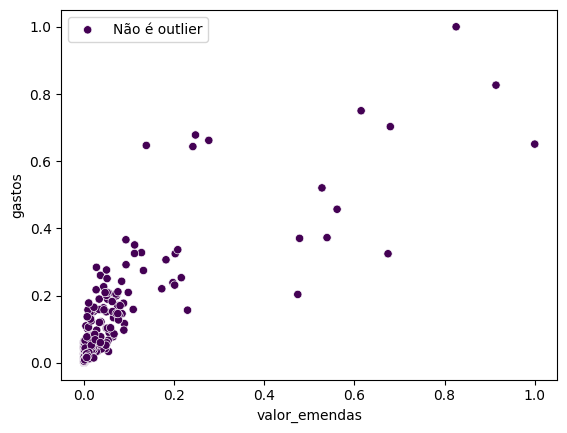

In [56]:
# Ver se tem outliers.
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

cluster_df = variaveis_uf_ano[['gastos','valor_emendas']].copy()

cluster_df['gastos'] = MinMaxScaler().\
    fit_transform(cluster_df[['gastos']])
cluster_df['valor_emendas'] = MinMaxScaler().\
    fit_transform(cluster_df[['valor_emendas']])

from sklearn.cluster import DBSCAN
cluster = DBSCAN().fit(cluster_df[['valor_emendas', 'gastos']])
ax = sns.scatterplot(data=cluster_df, x='valor_emendas', y='gastos', 
                     c=cluster.labels_)
ax.legend(['Não é outlier'])
#for state, idh, letalidade in zip(df.nome, df['valor_emendas'], 
#                                 df['gastos']):
#  ax.annotate(state, xy=(gastos, letalidade))

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# fazendo o mesmo gráfico anterior no plotly

cluster_df = variaveis_uf_ano[['gastos','valor_emendas']].copy()

# No need to normalize the data since Plotly Express handles that automatically

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You can adjust eps and min_samples
cluster_df['cluster'] = dbscan.fit_predict(cluster_df[['valor_emendas', 'gastos']])

fig = px.scatter(cluster_df, x='valor_emendas', y='gastos', color='cluster', template='plotly_dark',
                 labels={'valor_emendas': 'Emendas Parlamentares',
                                  'gastos': 'Gastos Hospitalares'},
                          hover_data=['valor_emendas', 'gastos'])

fig.update_layout(title=dict(text='Verificando Existência de Outliers', font=dict(size=24)),
        title_x=0.5)

# Customize the color scale, if needed
fig.update_traces(marker=dict(size=5))

# Add legend labels
fig.update_layout(legend_title='Legend', showlegend=True)
fig.update_layout(legend=dict(title=dict(text='Cluster')))
fig.update_layout(legend_traceorder='reversed')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showticklabels=False, showgrid=False)


fig.show()



In [64]:
variaveis_uf_ano

,uf,ano,gastos,gastos_percapita,mortalidade,valor_emendas
0,AC,2014,3.603932e+07,337.690253,0.920833,1.261524e+08
1,AC,2015,3.726202e+07,305.003132,1.236364,2.648756e+07
2,AC,2016,4.048715e+07,301.639801,1.342000,4.542464e+08
3,AC,2017,3.724553e+07,274.220778,1.467500,2.436925e+08
4,AC,2018,3.443257e+07,263.785812,1.718000,1.976735e+08
...,...,...,...,...,...,...
238,TO,2018,6.298209e+07,894.183551,1.939130,1.021493e+09
239,TO,2019,8.231413e+07,1001.786091,2.390476,5.708286e+09
240,TO,2020,9.288584e+07,1042.532604,2.676364,1.037564e+10
241,TO,2021,1.192244e+08,1455.791855,3.041538,4.138913e+09


In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN


clusterpc_df = variaveis_uf_ano[['gastos_percapita','valor_emendas']].copy()

# No need to normalize the data since Plotly Express handles that automatically

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You can adjust eps and min_samples
clusterpc_df['cluster'] = dbscan.fit_predict(clusterpc_df[['gastos_percapita', 'valor_emendas']])

fig = px.scatter(clusterpc_df, x='valor_emendas', y='gastos_percapita', color='cluster', template='plotly_dark',
                 labels={'valor_emendas': 'Emendas Parlamentares',
                                  'gastos_percapita': 'Gastos Hospitalares per capita'},
                          hover_data=['valor_emendas', 'gastos_percapita'])

fig.update_layout(title=dict(text='Verificando Existência de Outliers', font=dict(size=24)),
        title_x=0.5)

# Customize the color scale, if needed
fig.update_traces(marker=dict(size=5))

# Add legend labels
fig.update_layout(legend_title='Legend', showlegend=True)
fig.update_layout(legend=dict(title=dict(text='Cluster')))
fig.update_layout(legend_traceorder='reversed')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showticklabels=False, showgrid=False)


fig.show()

In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import plotly.express as px

# Assuming you have cluster_df with 'gastos', 'valor_emendas', and 'UF' columns
cluster_df = variaveis_uf_ano[['gastos', 'valor_emendas', 'uf']].copy()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You can adjust eps and min_samples
cluster_df['cluster'] = dbscan.fit_predict(cluster_df[['valor_emendas', 'gastos']])

# Identify outliers by cluster label (-1)
outliers_df = cluster_df[cluster_df['cluster'] == -1]

fig = px.scatter(cluster_df, x='valor_emendas', y='gastos', color='cluster', text='uf')

# Customize the color scale, if needed
fig.update_traces(marker=dict(size=5))

# Add legend labels
fig.update_layout(legend_title='Legend', showlegend=True)
fig.update_layout(legend=dict(title=dict(text='Cluster')))
fig.update_layout(legend_traceorder='reversed')

# Show the plot
fig.show()


In [ ]:
# Assuming you already have the cluster_df
# No need to normalize the data since Plotly Express handles that automatically

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You can adjust eps and min_samples
cluster_df['cluster'] = dbscan.fit_predict(cluster_df[['valor_emendas', 'gastos']])

fig = px.scatter(cluster_df, x='valor_emendas', y='gastos', color='cluster')

# Customize the color scale, if needed
fig.update_traces(marker=dict(size=5))

# Add legend labels
fig.update_layout(legend_title='Legend', showlegend=True)
fig.update_layout(legend=dict(title=dict(text='Cluster')))
fig.update_layout(legend_traceorder='reversed')

# Show the plot
fig.show()

In [ ]:
d